[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hamzah-it/mcu_screening/blob/main/mcu_v2.ipynb)

In [13]:
%pip install scikit-fuzzy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# definisi anteseden/input
tekanan_sistolik = ctrl.Antecedent(np.arange(55, 191, 1), 'tekanan_sistolik')
tekanan_diastolik = ctrl.Antecedent(np.arange(20, 111, 1), 'tekanan_diastolik')
nadi = ctrl.Antecedent(np.arange(40, 131, 1), 'nadi')
imt = ctrl.Antecedent(np.arange(15, 40.1, 0.1), 'imt')
umur = ctrl.Antecedent(np.arange(25, 76, 1), 'umur')

# definisi konsekuensi/output
memerlukan_mcu = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'memerlukan_mcu')

# membership function
tekanan_sistolik['rendah'] = fuzz.trapmf(tekanan_sistolik.universe, [55, 55, 80, 105])
tekanan_sistolik['normal'] = fuzz.trimf(tekanan_sistolik.universe, [90, 120, 140])
tekanan_sistolik['tinggi'] = fuzz.trapmf(tekanan_sistolik.universe, [130, 160, 190, 190])

tekanan_diastolik['rendah'] = fuzz.trapmf(tekanan_diastolik.universe, [20, 20, 40, 60])
tekanan_diastolik['normal'] = fuzz.trimf(tekanan_diastolik.universe, [50, 80, 90])
tekanan_diastolik['tinggi'] = fuzz.trapmf(tekanan_diastolik.universe, [80, 90, 110, 110])

nadi['rendah'] = fuzz.trapmf(nadi.universe, [40, 40, 50, 70])
nadi['normal'] = fuzz.trimf(nadi.universe, [60, 80, 100])
nadi['tinggi'] = fuzz.trapmf(nadi.universe, [90, 110, 130, 130])

imt['rendah'] = fuzz.trapmf(imt.universe, [15, 15, 18.5, 19.5])
imt['normal'] = fuzz.trimf(imt.universe, [18.5, 21.8, 25])
imt['tinggi'] = fuzz.trapmf(imt.universe, [24, 26, 40, 40])

umur['muda'] = fuzz.trapmf(umur.universe, [20, 20, 40, 60])
umur['tua'] = fuzz.trapmf(umur.universe, [55, 65, 75, 75])

memerlukan_mcu['tidak'] = fuzz.trapmf(memerlukan_mcu.universe, [0, 0, 0.3, 0.6])
memerlukan_mcu['butuh'] = fuzz.trapmf(memerlukan_mcu.universe, [0.4, 0.7, 1, 1])

# Plotting
tekanan_sistolik.view()
tekanan_diastolik.view()
nadi.view()
imt.view()
umur.view()
memerlukan_mcu.view()

In [15]:
# Rule Base
rule1 = ctrl.Rule(tekanan_sistolik['tinggi'] & tekanan_diastolik['tinggi'] & umur['tua'], memerlukan_mcu['butuh'])
rule2 = ctrl.Rule(tekanan_sistolik['tinggi'] & tekanan_diastolik['tinggi'] & umur['muda'], memerlukan_mcu['butuh'])
rule3 = ctrl.Rule(tekanan_sistolik['normal'] & tekanan_diastolik['normal'] & umur['tua'], memerlukan_mcu['butuh'])
rule4 = ctrl.Rule(tekanan_sistolik['normal'] & tekanan_diastolik['normal'] & umur['muda'], memerlukan_mcu['tidak'])
rule5 = ctrl.Rule(tekanan_sistolik['rendah'] & tekanan_diastolik['rendah'] & umur['tua'], memerlukan_mcu['butuh'])
rule6 = ctrl.Rule(tekanan_sistolik['rendah'] & tekanan_diastolik['rendah'] & umur['muda'], memerlukan_mcu['butuh'])
rule7 = ctrl.Rule(imt['tinggi'] & umur['tua'], memerlukan_mcu['butuh'])
rule8 = ctrl.Rule(imt['tinggi'] & umur['muda'], memerlukan_mcu['butuh'])
rule9 = ctrl.Rule(imt['normal'] & umur['tua'], memerlukan_mcu['butuh'])
rule10 = ctrl.Rule(imt['normal'] & umur['muda'], memerlukan_mcu['tidak'])
rule11 = ctrl.Rule(imt['rendah'] & umur['tua'], memerlukan_mcu['butuh'])
rule12 = ctrl.Rule(imt['rendah'] & umur['muda'], memerlukan_mcu['butuh'])
rule13 = ctrl.Rule(nadi['tinggi'] & umur['tua'], memerlukan_mcu['butuh'])
rule14 = ctrl.Rule(nadi['tinggi'] & umur['muda'], memerlukan_mcu['butuh'])
rule15 = ctrl.Rule(nadi['normal'] & umur['tua'], memerlukan_mcu['butuh'])
rule16 = ctrl.Rule(nadi['normal'] & umur['muda'], memerlukan_mcu['tidak'])
rule17 = ctrl.Rule(nadi['rendah'] & umur['tua'], memerlukan_mcu['butuh'])
rule18 = ctrl.Rule(nadi['rendah'] & umur['muda'], memerlukan_mcu['butuh'])

0.5855828220858896


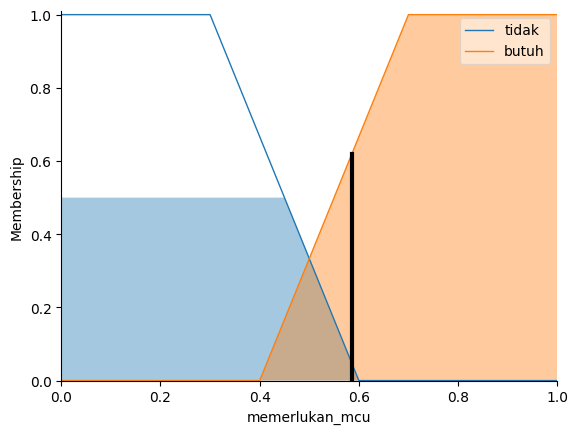

In [16]:
# Control System
rekomendasi_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, 
    rule4, rule5, rule6, 
    rule7, rule8, rule9, 
    rule10, rule11, rule12, 
    rule13, rule14, rule15, 
    rule16, rule17, rule18])
rekomendasi = ctrl.ControlSystemSimulation(rekomendasi_ctrl)

# Contoh pengujian
rekomendasi.input['tekanan_sistolik'] = 90
rekomendasi.input['tekanan_diastolik'] = 60
rekomendasi.input['umur'] = 25
rekomendasi.input['nadi'] = 70
rekomendasi.input['imt'] = 16.0

rekomendasi.compute()

print(rekomendasi.output['memerlukan_mcu'])
memerlukan_mcu.view(sim=rekomendasi)


    tekanan_sistolik  tekanan_diastolik  umur  nadi   imt
0                 90                 60    25    70  16.0
1                110                 75    23    83  16.5
2                118                 79    34    79  17.6
3                123                 81    23    89  17.7
4                110                 80    27   120  18.1
5                110                 90    34   100  21.1
6                110                 70    49    84  22.3
7                110                 70    34    74  22.5
8                135                 80    45    70  22.5
9                134                 76    28    78  23.8
10               130                 90    43    99  35.0
11               155                 98    43    87  40.0
12               140                 90    55    88  42.2
13               150                 90    38   113  61.7
14               110                 75    29    80  64.9
Output for row 1: 0.5855828220858896
Output for row 2: 0.520010438413361

/Users/hamzah/.pyenv/versions/3.11.6/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


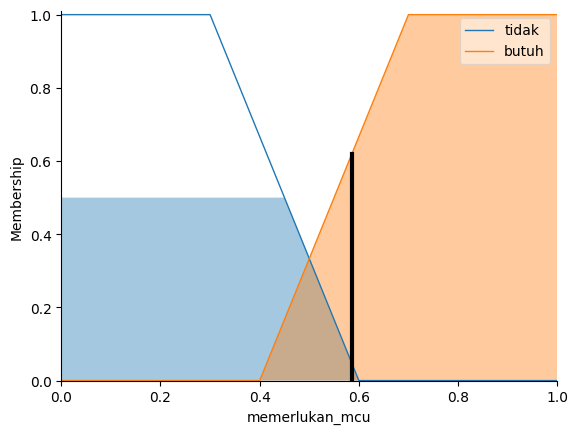

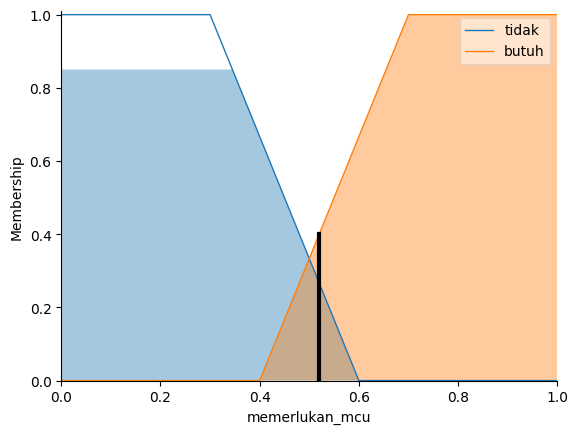

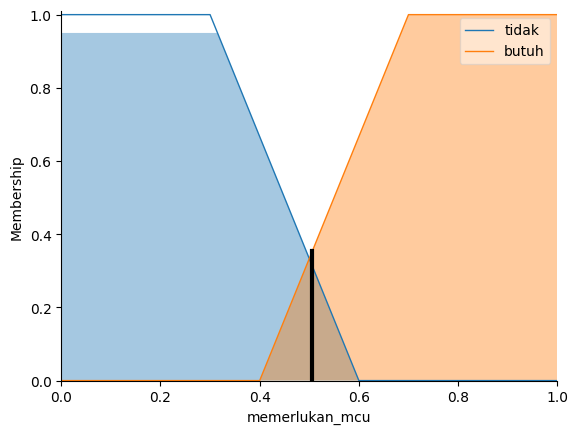

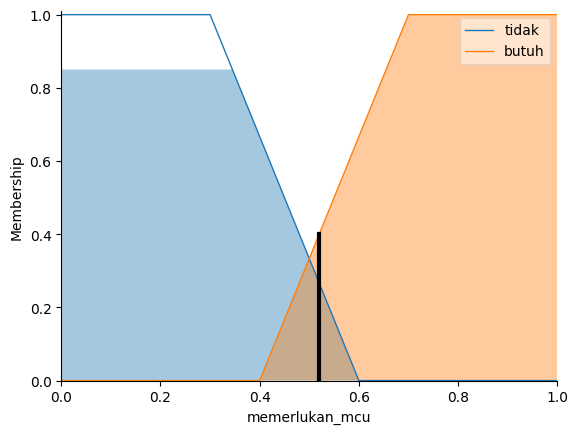

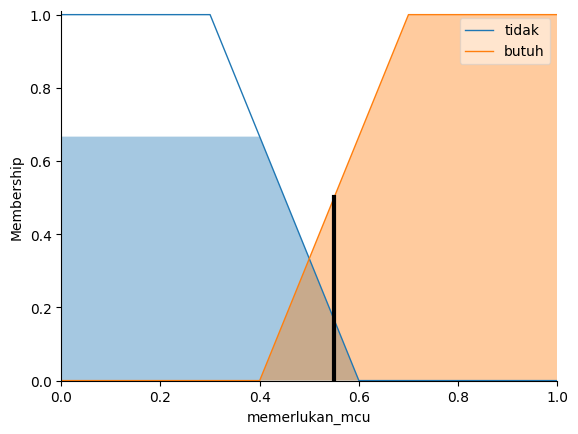

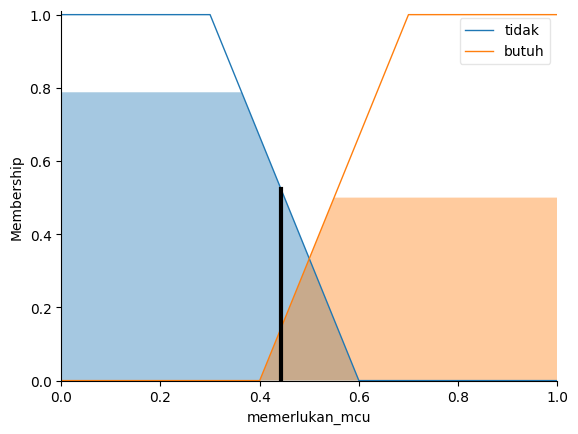

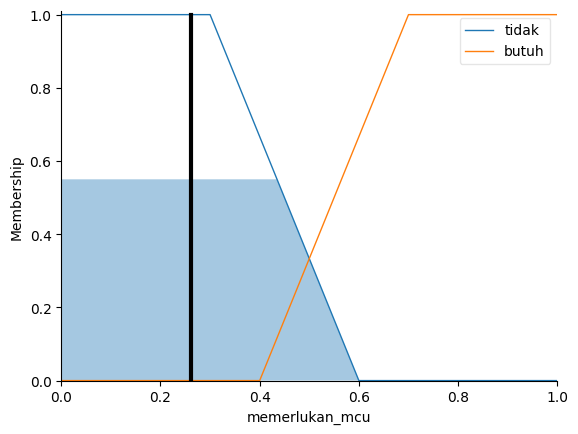

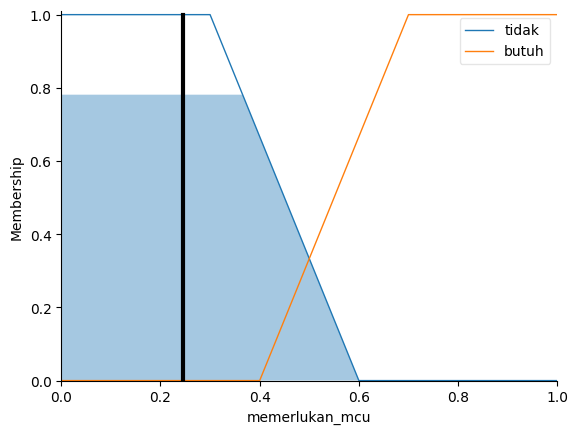

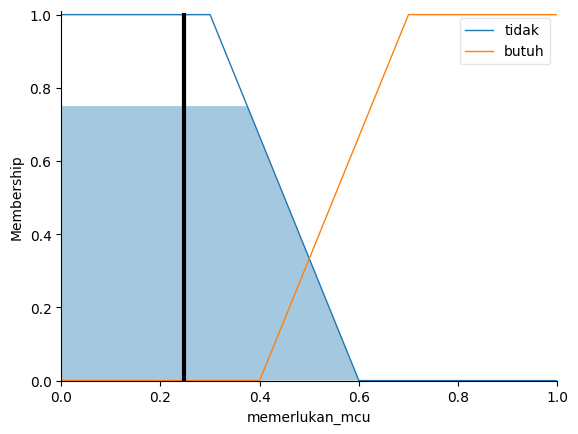

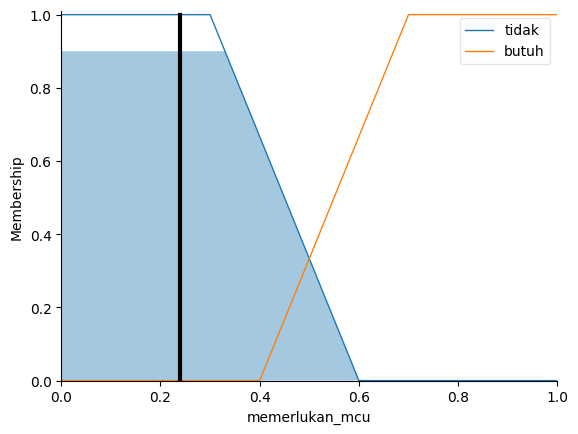

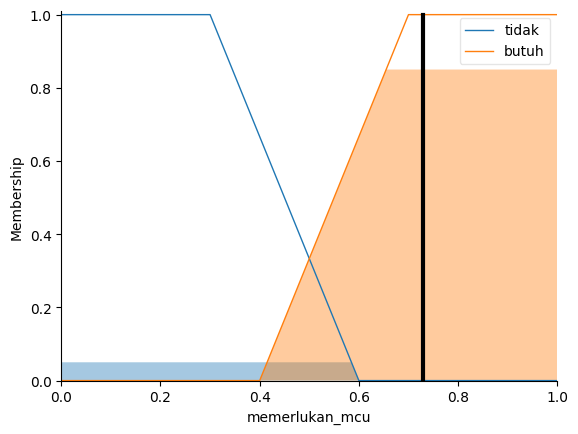

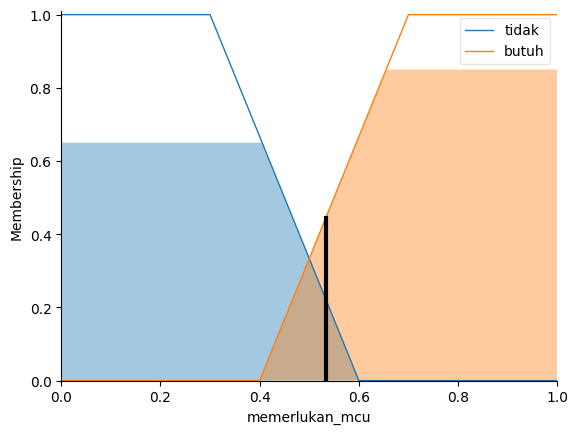

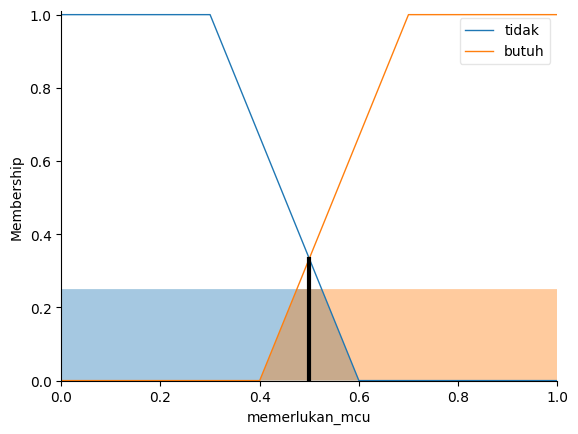

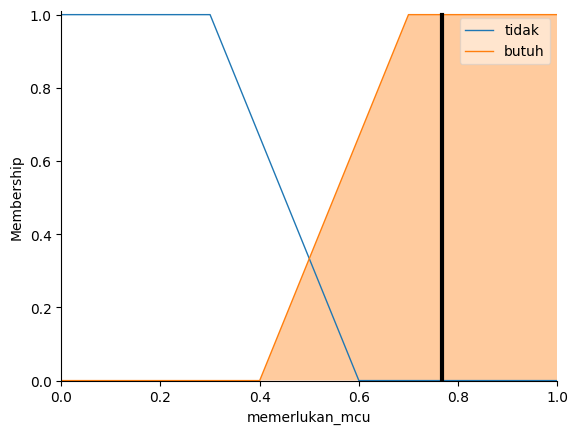

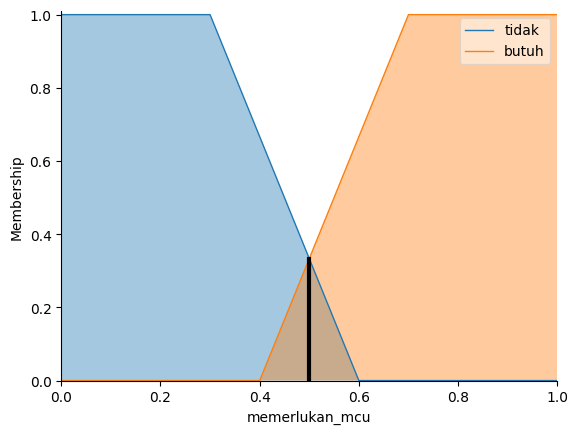

In [17]:
import pandas as pd

import requests
from io import BytesIO

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = pd.read_csv(BytesIO(response.content), delimiter=';')
        return data
    else:
        print("Failed to retrieve data. HTTP Status Code:", response.status_code)
        return None

url = 'https://raw.githubusercontent.com/hamzah-it/mcu_screening/main/mcu_data.csv'
mcu_data = download_data(url)

# daftar kolom data
print(mcu_data)

# Control System
rekomendasi_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, 
    rule4, rule5, rule6, 
    rule7, rule8, rule9, 
    rule10, rule11, rule12, 
    rule13, rule14, rule15, 
    rule16, rule17, rule18])

for index, row in mcu_data.iterrows():
    # Create a new simulation for each row
    rekomendasi = ctrl.ControlSystemSimulation(rekomendasi_ctrl)

    # Set input values for the current row
    rekomendasi.input['tekanan_sistolik'] = row['tekanan_sistolik']
    rekomendasi.input['tekanan_diastolik'] = row['tekanan_diastolik']
    rekomendasi.input['umur'] = row['umur']
    rekomendasi.input['nadi'] = row['nadi']
    rekomendasi.input['imt'] = row['imt']

    # Perform computation
    rekomendasi.compute()

    # Print output
    print(f"Output for row {index + 1}: {rekomendasi.output['memerlukan_mcu']}")
    # input_data.at[index, 'memerlukan_mcu'] = rekomendasi.output['memerlukan_mcu']
    memerlukan_mcu.view(sim=rekomendasi)


# print(input_data)
